### Credit: Team Leader (@ Fauzan Ihza Fajar)

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/addition/Jl.Kyai Tapa - Jl.Daan Mogot(Grogol)3 (1).csv
/kaggle/input/lalu-lintas/Gunung Sahari - Jl. Mangga Besar.csv
/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Gatot Subroto.csv
/kaggle/input/lalu-lintas/DI Panjaitan - Jl. Kalimalang.csv
/kaggle/input/lalu-lintas/Ahmad Yani - Jl.H.Ten.csv
/kaggle/input/lalu-lintas/Ahmad Yani- Jl.Pemuda.csv
/kaggle/input/lalu-lintas/Jl.Jembatan 2 Raya - Jl.Tubagus Angke.csv
/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Tomang Raya.csv
/kaggle/input/lalu-lintas/Jl. Gatot Subroto - Jl. H. R. Rasuna Said.csv
/kaggle/input/lalu-lintas/Perintis Kemerdekaan - Jl. Letjen Suprapto.csv
/kaggle/input/lalu-lintas/Jl.Kyai Tapa - Jl.Daan Mogot(Grogol)3.csv


In [7]:
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score

from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score

In [8]:
df1 = pd.read_csv('/kaggle/input/lalu-lintas/Ahmad Yani - Jl.H.Ten.csv')
df2 = pd.read_csv('/kaggle/input/lalu-lintas/Ahmad Yani- Jl.Pemuda.csv')
df3 = pd.read_csv('/kaggle/input/lalu-lintas/DI Panjaitan - Jl. Kalimalang.csv')
df4 = pd.read_csv('/kaggle/input/lalu-lintas/Gunung Sahari - Jl. Mangga Besar.csv')
df5 = pd.read_csv('/kaggle/input/lalu-lintas/Jl. Gatot Subroto - Jl. H. R. Rasuna Said.csv')
df6 = pd.read_csv('/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Gatot Subroto.csv')
df7 = pd.read_csv('/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Tomang Raya.csv')
df8 = pd.read_csv('/kaggle/input/lalu-lintas/Jl.Jembatan 2 Raya - Jl.Tubagus Angke.csv')
df9 = pd.read_csv('/kaggle/input/lalu-lintas/Jl.Kyai Tapa - Jl.Daan Mogot(Grogol)3.csv')
df10 = pd.read_csv('/kaggle/input/lalu-lintas/Perintis Kemerdekaan - Jl. Letjen Suprapto.csv')

In [9]:
df9['simpang'] = 'Jl.Kyai Tapa - Jl.Daan Mogot'
df8['simpang'] = 'Jl.Jembatan 2 Raya - Jl.Tubagus Angke'
df7['simpang'] = 'Jl. Letjen S. Parman - Jl. Tomang Raya'
df6['simpang'] = 'Jl. Letjen S. Parman - Jl. Gatot Subroto'
df5['simpang'] = 'Jl. Gatot Subroto - Jl. H. R. Rasuna Said'
df8.drop(columns=['asal','tujuan'],inplace=True)
df7.drop(columns=['asal','tujuan'],inplace=True)
df6.drop(columns=['asal','tujuan'],inplace=True)
df5.drop(columns=['asal','tujuan'],inplace=True)


In [10]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df_final['Time'] = pd.to_datetime(df_final['Time'])
df_final = df_final[df_final['Time'].dt.month > 5]
df_final

,Unnamed: 0,Time,origin,destination,travel_time_seconds,base_duration,length,simpang
170,170,2023-06-01 06:00:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",84,86,505,Ahmad Yani - Jl.H.Ten
171,171,2023-06-01 06:15:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",84,86,505,Ahmad Yani - Jl.H.Ten
172,172,2023-06-01 06:30:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",86,86,505,Ahmad Yani - Jl.H.Ten
173,173,2023-06-01 06:45:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",87,86,505,Ahmad Yani - Jl.H.Ten
174,174,2023-06-01 07:00:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",89,86,505,Ahmad Yani - Jl.H.Ten
...,...,...,...,...,...,...,...,...
335,335,2023-06-07 19:00:00,"(-6.167151529252891, 106.88094231348498)","(-6.166575524707153, 106.87655421965444)",81,55,498,Perintis Kemerdekaan - Jl. Letjen Suprapto
336,336,2023-06-07 19:15:00,"(-6.167151529252891, 106.88094231348498)","(-6.166575524707153, 106.87655421965444)",80,55,498,Perintis Kemerdekaan - Jl. Letjen Suprapto
337,337,2023-06-07 19:30:00,"(-6.167151529252891, 106.88094231348498)","(-6.166575524707153, 106.87655421965444)",80,55,498,Perintis Kemerdekaan - Jl. Letjen Suprapto
338,338,2023-06-07 19:45:00,"(-6.167151529252891, 106.88094231348498)","(-6.166575524707153, 106.87655421965444)",77,55,498,Perintis Kemerdekaan - Jl. Letjen Suprapto


# Preprocessing

In [11]:
df_final['Jam'] = df_final['Time'].dt.hour
df_final['Menit'] = df_final['Time'].dt.minute
df_final['Kecepatan_normal'] = df_final['length'] / df_final['base_duration']
df_final.head()

,Unnamed: 0,Time,origin,destination,travel_time_seconds,base_duration,length,simpang,Jam,Menit,Kecepatan_normal
170,170,2023-06-01 06:00:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",84,86,505,Ahmad Yani - Jl.H.Ten,6,0,5.872093
171,171,2023-06-01 06:15:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",84,86,505,Ahmad Yani - Jl.H.Ten,6,15,5.872093
172,172,2023-06-01 06:30:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",86,86,505,Ahmad Yani - Jl.H.Ten,6,30,5.872093
173,173,2023-06-01 06:45:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",87,86,505,Ahmad Yani - Jl.H.Ten,6,45,5.872093
174,174,2023-06-01 07:00:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",89,86,505,Ahmad Yani - Jl.H.Ten,7,0,5.872093


In [12]:
# # Mengonversi kolom 'Time' menjadi tipe datetime
# df_final['Time'] = pd.to_datetime(df_final['Time'])

# # Mengatur kolom 'Time' sebagai indeks
# df_final.set_index('Time', inplace=True)

# # Memisahkan dataset untuk rentang waktu 06:00 - 10:00 pagi
# morning_data = df_final.between_time('06:00', '10:00')

# # Memisahkan dataset untuk rentang waktu 16:00 - 20:00
# afternoon_data = df_final.between_time('16:00', '20:00')
# df_final_morning = morning_data.reset_index()
# df_final_afternoon = afternoon_data.reset_index()

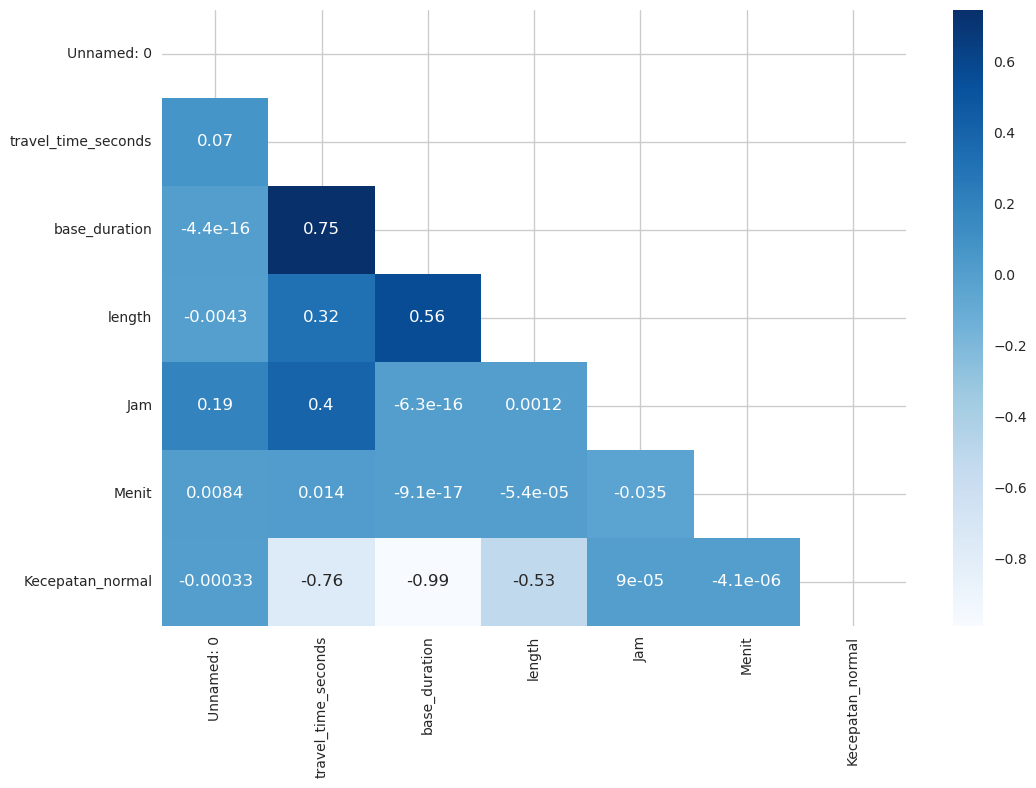

In [13]:
# check correlation between numerical features

corr = df_final.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12,8))
#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

In [14]:
df_final_fix = df_final.drop(columns=['Time','origin','destination','Unnamed: 0'])

# Scaling

In [15]:
# Mengonversi jam dan menit menjadi sudut dalam radian
df_final_fix['Jam_radian'] = 2 * np.pi * df_final_fix['Jam'] / 24
df_final_fix['Menit_radian'] = 2 * np.pi * df_final_fix['Menit'] / 60

# Menghitung sin dan cos dari sudut jam dan menit
df_final_fix['Jam_sin'] = np.sin(df_final_fix['Jam_radian'])
df_final_fix['Jam_cos'] = np.cos(df_final_fix['Jam_radian'])
df_final_fix['Menit_sin'] = np.sin(df_final_fix['Menit_radian'])
df_final_fix['Menit_cos'] = np.cos(df_final_fix['Menit_radian'])
df_final_fix.drop(columns=['Jam','Menit'],inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final_fix['simpang'] = label_encoder.fit_transform(df_final_fix['simpang'])

In [17]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()
columns_to_scale = ['base_duration','length']
# Terapkan StandardScaler pada kolom-kolom yang dipilih
df_final_fix[columns_to_scale] = scaler.fit_transform(df_final_fix[columns_to_scale])

In [18]:
df_final_fix1 = np.array(df_final_fix['travel_time_seconds']).reshape(-1,1)

# Modeling Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

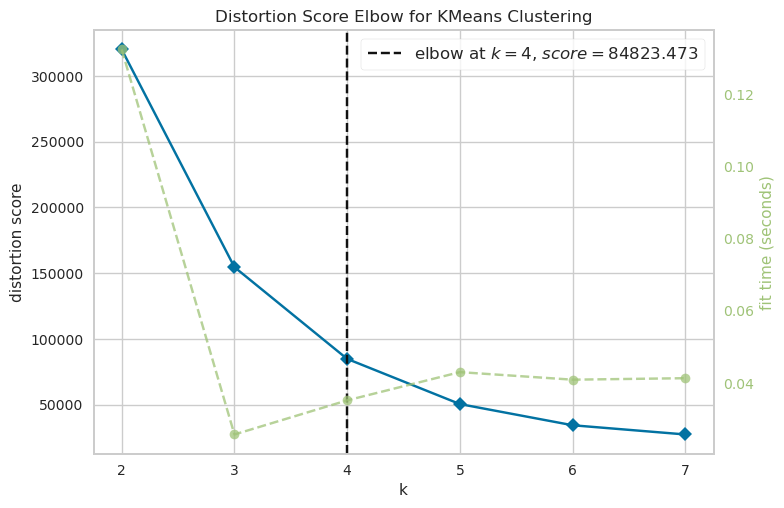

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#using Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42), k=7)
Elbow_fast.fit(df_final_fix1)
Elbow_fast.show()

In [20]:
#fit
target_scaled = df_final_fix1
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=7)
kmeans_4.fit(target_scaled)

#predict
pred_4 = kmeans_4.predict(target_scaled)

#save it to origin preprocess_it df
df_final_fix['cluster'] = pred_4

df_final_fix.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,travel_time_seconds,base_duration,length,simpang,Kecepatan_normal,Jam_radian,Menit_radian,Jam_sin,Jam_cos,Menit_sin,Menit_cos,cluster
170,84,1.456696,0.91107,0,5.872093,1.570796,0.000000,1.000000,6.123234e-17,0.000000e+00,1.000000e+00,0
171,84,1.456696,0.91107,0,5.872093,1.570796,1.570796,1.000000,6.123234e-17,1.000000e+00,2.832769e-16,0
172,86,1.456696,0.91107,0,5.872093,1.570796,3.141593,1.000000,6.123234e-17,5.665539e-16,-1.000000e+00,0
173,87,1.456696,0.91107,0,5.872093,1.570796,4.712389,1.000000,6.123234e-17,-1.000000e+00,-1.836970e-16,0
174,89,1.456696,0.91107,0,5.872093,1.832596,0.000000,0.965926,-2.588190e-01,0.000000e+00,1.000000e+00,0


In [21]:
# Evaluating our model
X = np.asarray(target_scaled)

#evaluation for k=4
#using silhouette score
sil_score = silhouette_score(X, kmeans_4.labels_, metric='euclidean')
#using davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_4.labels_)

print('Silhouette Score: %.3f' % sil_score)
print('Davies Bouldin Score: %.3f' % dav_score)

Silhouette Score: 0.596
Davies Bouldin Score: 0.462


In [22]:
df_final_fix.cluster.value_counts()

0    609
1    540
2    460
3     91
Name: cluster, dtype: int64

# Modelling Regresi

In [23]:
df_final_fix.head()

,travel_time_seconds,base_duration,length,simpang,Kecepatan_normal,Jam_radian,Menit_radian,Jam_sin,Jam_cos,Menit_sin,Menit_cos,cluster
170,84,1.456696,0.91107,0,5.872093,1.570796,0.000000,1.000000,6.123234e-17,0.000000e+00,1.000000e+00,0
171,84,1.456696,0.91107,0,5.872093,1.570796,1.570796,1.000000,6.123234e-17,1.000000e+00,2.832769e-16,0
172,86,1.456696,0.91107,0,5.872093,1.570796,3.141593,1.000000,6.123234e-17,5.665539e-16,-1.000000e+00,0
173,87,1.456696,0.91107,0,5.872093,1.570796,4.712389,1.000000,6.123234e-17,-1.000000e+00,-1.836970e-16,0
174,89,1.456696,0.91107,0,5.872093,1.832596,0.000000,0.965926,-2.588190e-01,0.000000e+00,1.000000e+00,0


In [24]:
X_regresi, y_regresi = df_final_fix.drop(columns=['travel_time_seconds','cluster']), df_final_fix['travel_time_seconds']
print(X_regresi.shape)
print(y_regresi.shape)

(1700, 10)
(1700,)


In [25]:
X_regresi.head()

,base_duration,length,simpang,Kecepatan_normal,Jam_radian,Menit_radian,Jam_sin,Jam_cos,Menit_sin,Menit_cos
170,1.456696,0.91107,0,5.872093,1.570796,0.000000,1.000000,6.123234e-17,0.000000e+00,1.000000e+00
171,1.456696,0.91107,0,5.872093,1.570796,1.570796,1.000000,6.123234e-17,1.000000e+00,2.832769e-16
172,1.456696,0.91107,0,5.872093,1.570796,3.141593,1.000000,6.123234e-17,5.665539e-16,-1.000000e+00
173,1.456696,0.91107,0,5.872093,1.570796,4.712389,1.000000,6.123234e-17,-1.000000e+00,-1.836970e-16
174,1.456696,0.91107,0,5.872093,1.832596,0.000000,0.965926,-2.588190e-01,0.000000e+00,1.000000e+00


In [26]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
def smape(actual, predicted):
    absolute_errors = np.abs(predicted - actual)
    scaled_errors = 2 * absolute_errors / (np.abs(predicted) + np.abs(actual))
    return np.mean(scaled_errors) * 100


# Buat scorer khusus untuk sMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)
kf= KFold(n_splits=5, shuffle=True, random_state=42)

## Random Forest Regressor

In [77]:
rfc = RandomForestRegressor()
mse_scores = cross_val_score(rfc,X_regresi, y_regresi, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", np.mean(-mse_scores))

smape_scores = cross_val_score(rfc, X_regresi, y_regresi, cv=kf, scoring=smape_scorer)
print("Average SMAPE:", np.mean(-smape_scores))

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = cross_val_score(rfc, X_regresi, y_regresi, cv=kf, scoring=make_scorer(rmse_scorer))
print("Average RMSE:", np.mean(rmse_scores))

Average MSE: 4.242035220790809
Average SMAPE: 1.7184607682717323
Average RMSE: 2.0705880341775873


# Random Forest Regressor Tuning

In [ ]:
from time import time
import pprint
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

# A wrapper for measuring time and performances of different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

# Setting the search space
search_spaces = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0),
    'min_impurity_decrease': Real(0.0, 1.0)
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create BayesSearchCV object
opt = BayesSearchCV(
    rf_regressor,
    search_spaces,
    scoring=smape_scorer,
    cv=kf,
    n_jobs=1,
    n_iter=200,
    return_train_score=False,
    refit=True,
    verbose=100
)

# Report the best parameters
best_params = report_perf(opt,X_regresi, y_regresi, 'Random Forest Regressor')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=0.914731016053886, min_impurity_decrease=0.23454293186910108, min_samples_leaf=6, min_samples_split=4, n_estimators=56
[CV 1/5; 1/1] END max_depth=13, max_features=0.914731016053886, min_impurity_decrease=0.23454293186910108, min_samples_leaf=6, min_samples_split=4, n_estimators=56;, score=-2.697 total time=   0.2s
[CV 2/5; 1/1] START max_depth=13, max_features=0.914731016053886, min_impurity_decrease=0.23454293186910108, min_samples_leaf=6, min_samples_split=4, n_estimators=56
[CV 2/5; 1/1] END max_depth=13, max_features=0.914731016053886, min_impurity_decrease=0.23454293186910108, min_samples_leaf=6, min_samples_split=4, n_estimators=56;, score=-2.546 total time=   0.2s
[CV 3/5; 1/1] START max_depth=13, max_features=0.914731016053886, min_impurity_decrease=0.23454293186910108, min_samples_leaf=6, min_samples_split=4, n_estimators=56
[CV 3/5; 1/1] END max_depth=13, max_features=0.

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.768 total time=   0.8s
[CV 2/5; 1/1] START max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.601 total time=   0.8s
[CV 3/5; 1/1] START max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.707 total time=   0.8s
[CV 4/5; 1/1] START max

## XGB Regressor

In [27]:
xgb_model = xgb.XGBRegressor()
mse_scores = cross_val_score(xgb_model,X_regresi, y_regresi, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", np.mean(-mse_scores))

smape_scores = cross_val_score(xgb_model, X_regresi, y_regresi, cv=kf, scoring=smape_scorer)
print("Average SMAPE:", np.mean(-smape_scores))

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = cross_val_score(xgb_model, X_regresi, y_regresi, cv=kf, scoring=make_scorer(rmse_scorer))
print("Average RMSE:", np.mean(rmse_scores))

Average MSE: 4.267942739442985
Average SMAPE: 1.7290811418028553
Average RMSE: 2.0646314850630376


# Modelling Klasifikasi



In [79]:
X_klasifikasi, y_klasifikasi =df_final_fix.drop(columns=['cluster','travel_time_seconds']), df_final_fix['cluster']
print(X_klasifikasi.shape)
print(y_klasifikasi.shape)

(1700, 10)
(1700,)


In [82]:
# Fit classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_klasifikasi, y_klasifikasi, test_size=0.2, random_state=42)
xgb_classifier.fit(X_train, y_train)

# predict test set
y_pred_def = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb_classifier.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb_classifier.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def, average='macro')) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def, average='macro')) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def, average='macro')*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 97.06%
Test Accuracy : 95.59%
Precision Score : 96.77%
Recall Score : 95.36%
F1 Score : 96.02%


In [83]:
X,y = X_klasifikasi, y_klasifikasi

# Inisialisasi list untuk menyimpan hasil evaluasi
accuracies = []
precisions = []
recalls = []
f1_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the XGBoost classifier on the training data
    xgb_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = xgb_classifier.predict(X_test)

    # Evaluate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Hitung dan Tampilkan Hasil Evaluasi
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Mean Precision: {:.2f}%".format(mean_precision* 100))
print("Mean Recall: {:.2f}%".format(mean_recall* 100))
print("Mean F1 Score: {:.2f}%".format(mean_f1_score* 100))

Mean Accuracy: 95.29%
Mean Precision: 95.38%
Mean Recall: 95.29%
Mean F1 Score: 95.28%
